In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [6]:
train_df =  pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [7]:
y_train = train_df['SalePrice'].copy()
train_features = train_df.drop(['Id', 'SalePrice'], axis=1)

In [10]:
test_features = test_df.drop('Id', axis=1)

In [11]:
all_df = pd.concat([train_features, test_features], ignore_index=True)

In [12]:
print(f"Shape of original train_df: {train_df.shape}")
print(f"Shape of original test_df: {test_df.shape}")
print(f"Shape of combined all_df: {all_df.shape}")

Shape of original train_df: (1460, 81)
Shape of original test_df: (1459, 80)
Shape of combined all_df: (2919, 79)


In [14]:
# Now, let's get the missing value summary for this combined 'all_df'
missing_values_all = all_df.isnull().sum().sort_values(ascending=False)
missing_percent_all = (all_df.isnull().sum() / len(all_df) * 100).sort_values(ascending=False)
missing_data_summary_all = pd.concat([missing_values_all, missing_percent_all], axis=1, keys=['Total Missing', 'Percent Missing'])

print("\nColumns with missing values (Combined Data - all_df):")
# We only want to see columns that actually have missing values
print(missing_data_summary_all[missing_data_summary_all['Total Missing'] > 0])


Columns with missing values (Combined Data - all_df):
              Total Missing  Percent Missing
PoolQC                 2909        99.657417
MiscFeature            2814        96.402878
Alley                  2721        93.216855
Fence                  2348        80.438506
MasVnrType             1766        60.500171
FireplaceQu            1420        48.646797
LotFrontage             486        16.649538
GarageCond              159         5.447071
GarageFinish            159         5.447071
GarageYrBlt             159         5.447071
GarageQual              159         5.447071
GarageType              157         5.378554
BsmtExposure             82         2.809181
BsmtCond                 82         2.809181
BsmtQual                 81         2.774923
BsmtFinType2             80         2.740665
BsmtFinType1             79         2.706406
MasVnrArea               23         0.787941
MSZoning                  4         0.137033
BsmtHalfBath              2         0.068517


In [15]:
# Columns where NaN means 'None' (categorical)
cols_fill_none_categorical = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
    'MasVnrType' # MasVnrType also fits here as 'None' is a valid described category for NA
]

for col in cols_fill_none_categorical:
    all_df[col] = all_df[col].fillna('None')

print("Filled 'None' for categorical features. Checking a few values:")
print(all_df[['PoolQC', 'Alley', 'FireplaceQu', 'GarageType', 'BsmtQual', 'MasVnrType']].head())

Filled 'None' for categorical features. Checking a few values:
  PoolQC Alley FireplaceQu GarageType BsmtQual MasVnrType
0   None  None        None     Attchd       Gd    BrkFace
1   None  None          TA     Attchd       Gd       None
2   None  None          TA     Attchd       Gd    BrkFace
3   None  None          Gd     Detchd       TA       None
4   None  None          TA     Attchd       Gd    BrkFace


In [16]:
# Columns where NaN means 0 (numerical - often because the feature itself doesn't exist)
cols_fill_zero_numerical = [
    'MasVnrArea',
    'GarageYrBlt', # Year 0 can signify 'No Garage' as it's distinct from actual years
    'GarageCars', 'GarageArea',
    'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
    'BsmtFullBath', 'BsmtHalfBath'
]

for col in cols_fill_zero_numerical:
    all_df[col] = all_df[col].fillna(0)

print("\nFilled 0 for related numerical features. Checking a few values:")
# Let's check an example where GarageType might be 'None' and see GarageCars/Area
print(all_df[all_df['GarageType'] == 'None'][['GarageType', 'GarageCars', 'GarageArea', 'GarageYrBlt']].head())
# Let's check an example where BsmtQual might be 'None'
print(all_df[all_df['BsmtQual'] == 'None'][['BsmtQual', 'TotalBsmtSF', 'BsmtFullBath']].head())


Filled 0 for related numerical features. Checking a few values:
   GarageType  GarageCars  GarageArea  GarageYrBlt
39       None         0.0         0.0          0.0
48       None         0.0         0.0          0.0
78       None         0.0         0.0          0.0
88       None         0.0         0.0          0.0
89       None         0.0         0.0          0.0
    BsmtQual  TotalBsmtSF  BsmtFullBath
17      None          0.0           0.0
39      None          0.0           0.0
90      None          0.0           0.0
102     None          0.0           0.0
156     None          0.0           0.0


In [17]:
# Re-check missing values after Group 1 and Group 2 imputation
missing_values_after_group1_2 = all_df.isnull().sum().sort_values(ascending=False)
missing_percent_after_group1_2 = (all_df.isnull().sum() / len(all_df) * 100).sort_values(ascending=False)
missing_summary_after_group1_2 = pd.concat(
    [missing_values_after_group1_2, missing_percent_after_group1_2],
    axis=1, keys=['Total Missing', 'Percent Missing']
)

print("\nColumns with missing values (After Group 1 & 2 Imputation):")
print(missing_summary_after_group1_2[missing_summary_after_group1_2['Total Missing'] > 0])


Columns with missing values (After Group 1 & 2 Imputation):
             Total Missing  Percent Missing
LotFrontage            486        16.649538
MSZoning                 4         0.137033
Utilities                2         0.068517
Functional               2         0.068517
Exterior2nd              1         0.034258
Exterior1st              1         0.034258
Electrical               1         0.034258
SaleType                 1         0.034258
KitchenQual              1         0.034258


In [18]:
print(f"Missing LotFrontage before imputation: {all_df['LotFrontage'].isnull().sum()}")

# Impute LotFrontage using the median of the Neighborhood
# .transform() applies a function (here, filling NA with group median)
# and returns a Series with the same index as the original DataFrame group.
all_df['LotFrontage'] = all_df.groupby('Neighborhood')['LotFrontage'] \
                              .transform(lambda x: x.fillna(x.median()))

# Check if any NaNs remain (e.g., if a whole neighborhood had no LotFrontage data)
remaining_lotfrontage_na = all_df['LotFrontage'].isnull().sum()
if remaining_lotfrontage_na > 0:
    print(f"Still {remaining_lotfrontage_na} missing LotFrontage values after neighborhood median imputation.")
    # Fill any remaining NaNs with the global median LotFrontage
    global_median_lotfrontage = all_df['LotFrontage'].median()
    all_df['LotFrontage'] = all_df['LotFrontage'].fillna(global_median_lotfrontage)
    print(f"Filled remaining with global median: {global_median_lotfrontage}")

print(f"Missing LotFrontage after imputation: {all_df['LotFrontage'].isnull().sum()}")

Missing LotFrontage before imputation: 486
Missing LotFrontage after imputation: 0


In [19]:
# Columns with few missing categorical values - impute with mode
cols_fill_mode_categorical = [
    'MSZoning', 'Utilities', 'Functional', 'Exterior1st',
    'Exterior2nd', 'Electrical', 'SaleType', 'KitchenQual'
]

for col in cols_fill_mode_categorical:
    # Check if the column actually exists in all_df and has missing values
    # This is good practice in case the list was manually typed and has an error,
    # or if previous steps somehow already filled one of these.
    if col in all_df.columns and all_df[col].isnull().any():
        mode_val = all_df[col].mode()[0] # .mode() can return multiple if ties, so take the first
        all_df[col] = all_df[col].fillna(mode_val)
        print(f"Filled NaN in '{col}' with mode: '{mode_val}'. Missing now: {all_df[col].isnull().sum()}")
    elif col not in all_df.columns:
        print(f"Warning: Column '{col}' not found in DataFrame.")
    # else: # No missing values in this column, or column not found
        # print(f"No missing values to fill in '{col}' or column not found.")


# A quick check on one of them
print(f"\nMissing MSZoning after imputation: {all_df['MSZoning'].isnull().sum()}")

Filled NaN in 'MSZoning' with mode: 'RL'. Missing now: 0
Filled NaN in 'Utilities' with mode: 'AllPub'. Missing now: 0
Filled NaN in 'Functional' with mode: 'Typ'. Missing now: 0
Filled NaN in 'Exterior1st' with mode: 'VinylSd'. Missing now: 0
Filled NaN in 'Exterior2nd' with mode: 'VinylSd'. Missing now: 0
Filled NaN in 'Electrical' with mode: 'SBrkr'. Missing now: 0
Filled NaN in 'SaleType' with mode: 'WD'. Missing now: 0
Filled NaN in 'KitchenQual' with mode: 'TA'. Missing now: 0

Missing MSZoning after imputation: 0


In [20]:
# Final check for any missing values
final_missing_summary = all_df.isnull().sum().sort_values(ascending=False)
print("\nFinal check for missing values in all_df:")
print(final_missing_summary[final_missing_summary > 0])

if final_missing_summary.sum() == 0:
    print("\nCongratulations! No more missing values in all_df.")
else:
    print("\nWarning! Some missing values still remain. Please review.")


Final check for missing values in all_df:
Series([], dtype: int64)

Congratulations! No more missing values in all_df.


In [21]:
print(f"Data type of MSSubClass before conversion: {all_df['MSSubClass'].dtype}")
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)
print(f"Data type of MSSubClass after conversion: {all_df['MSSubClass'].dtype}")

# You can also check its unique values now to see they are strings
print(f"Unique values in MSSubClass after conversion: {all_df['MSSubClass'].unique()[:5]}...") # Show first 5

Data type of MSSubClass before conversion: int64
Data type of MSSubClass after conversion: object
Unique values in MSSubClass after conversion: ['60' '20' '70' '50' '190']...


In [22]:
print("\nData types of all columns in all_df:")
print(all_df.dtypes.value_counts()) # Get a count of each data type
print("\nFirst few columns with their types:")
print(all_df.dtypes.head(10))
print("\nLast few columns with their types:")
print(all_df.dtypes.tail(10))


Data types of all columns in all_df:
object     44
int64      24
float64    11
Name: count, dtype: int64

First few columns with their types:
MSSubClass      object
MSZoning        object
LotFrontage    float64
LotArea          int64
Street          object
Alley           object
LotShape        object
LandContour     object
Utilities       object
LotConfig       object
dtype: object

Last few columns with their types:
ScreenPorch       int64
PoolArea          int64
PoolQC           object
Fence            object
MiscFeature      object
MiscVal           int64
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
dtype: object


In [23]:
# Number of rows in the original training set
n_train = train_df.shape[0] # train_df is our original loaded training data
print(f"Number of rows in original training set: {n_train}")

# Split all_df back into a temporary training set (for EDA with SalePrice) and test set
train_eda_df = all_df[:n_train].copy() # Take the first n_train rows
test_eda_df = all_df[n_train:].copy()  # Take the remaining rows

# Add SalePrice back to train_eda_df
train_eda_df['SalePrice'] = y_train

print(f"Shape of train_eda_df: {train_eda_df.shape}")
print(f"Shape of test_eda_df: {test_eda_df.shape}") # Should match original test_df features

Number of rows in original training set: 1460
Shape of train_eda_df: (1460, 80)
Shape of test_eda_df: (1459, 79)


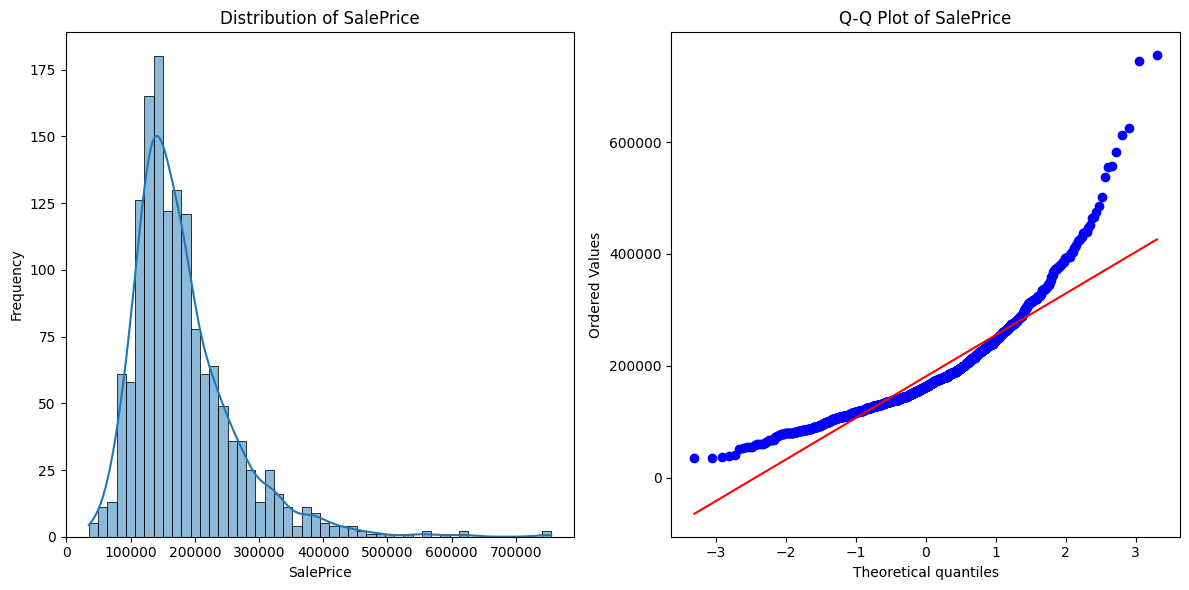

Skewness of SalePrice: 1.88
Kurtosis of SalePrice: 6.54


In [24]:
import scipy.stats as stats # For skewness and kurtosis, and probability plot

plt.figure(figsize=(12, 6))

# Histogram and KDE plot
plt.subplot(1, 2, 1)
sns.histplot(train_eda_df['SalePrice'], kde=True, bins=50)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')

# Q-Q plot (Quantile-Quantile plot) to check for normality
plt.subplot(1, 2, 2)
stats.probplot(train_eda_df['SalePrice'], plot=plt)
plt.title('Q-Q Plot of SalePrice')

plt.tight_layout()
plt.show()

# Calculate Skewness and Kurtosis
skewness = train_eda_df['SalePrice'].skew()
kurtosis = train_eda_df['SalePrice'].kurt()
print(f"Skewness of SalePrice: {skewness:.2f}")
print(f"Kurtosis of SalePrice: {kurtosis:.2f}")

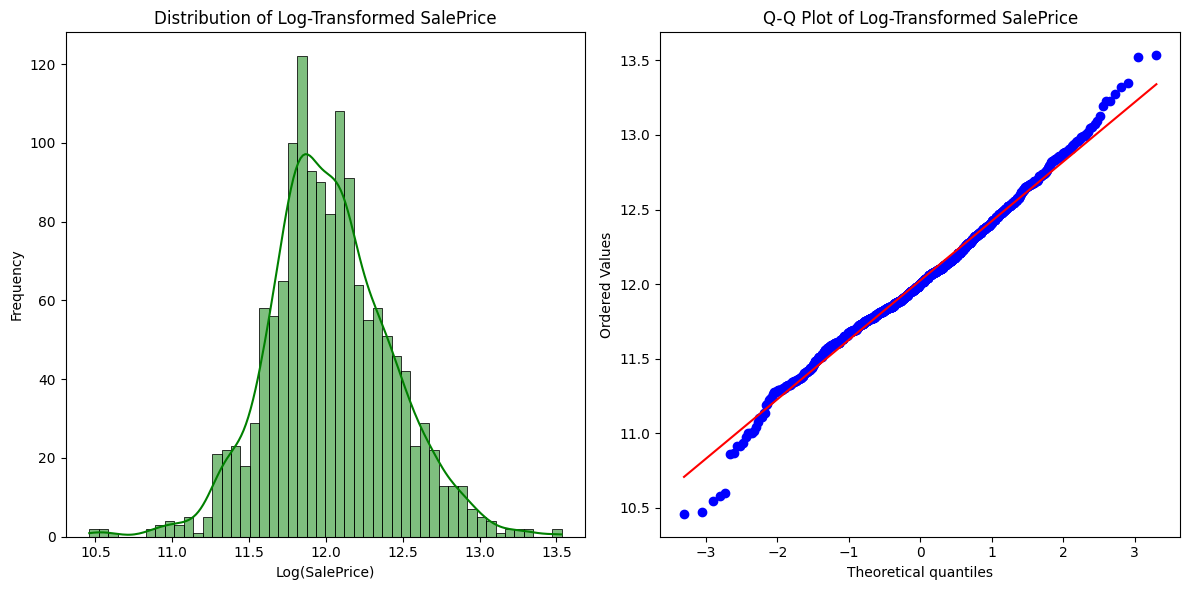

Skewness of Log-Transformed SalePrice: 0.12
Kurtosis of Log-Transformed SalePrice: 0.81


In [25]:
# Apply log transformation to SalePrice
# We'll store it in a new column in train_eda_df for comparison
train_eda_df['SalePrice_Log'] = np.log(train_eda_df['SalePrice'])

# Now, let's visualize the distribution of the log-transformed SalePrice
plt.figure(figsize=(12, 6))

# Histogram and KDE plot for Log-Transformed SalePrice
plt.subplot(1, 2, 1)
sns.histplot(train_eda_df['SalePrice_Log'], kde=True, bins=50, color='green')
plt.title('Distribution of Log-Transformed SalePrice')
plt.xlabel('Log(SalePrice)')
plt.ylabel('Frequency')

# Q-Q plot for Log-Transformed SalePrice
plt.subplot(1, 2, 2)
stats.probplot(train_eda_df['SalePrice_Log'], plot=plt)
plt.title('Q-Q Plot of Log-Transformed SalePrice')

plt.tight_layout()
plt.show()

# Calculate Skewness and Kurtosis for Log-Transformed SalePrice
log_skewness = train_eda_df['SalePrice_Log'].skew()
log_kurtosis = train_eda_df['SalePrice_Log'].kurt()
print(f"Skewness of Log-Transformed SalePrice: {log_skewness:.2f}")
print(f"Kurtosis of Log-Transformed SalePrice: {log_kurtosis:.2f}")

Correlation of numerical features with SalePrice_Log (descending):
SalePrice_Log    1.000000
SalePrice        0.948374
OverallQual      0.817184
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
TotRmsAbvGrd     0.534422
Fireplaces       0.489449
MasVnrArea       0.426775
BsmtFinSF1       0.372023
LotFrontage      0.351233
GarageYrBlt      0.349014
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209044
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057329
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
KitchenAbvGr    -0.1475

<ipython-input-26-7cb7092914dd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")


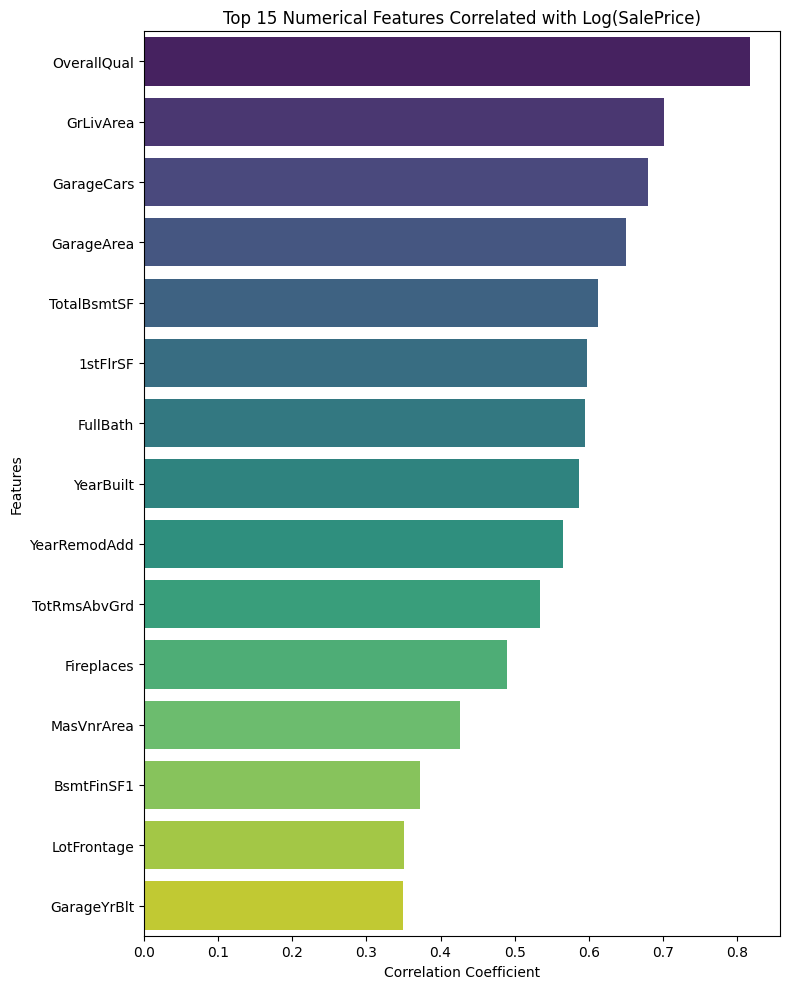

In [26]:
# Ensure 'SalePrice_Log' is in train_eda_df if it's not already
if 'SalePrice_Log' not in train_eda_df.columns:
    train_eda_df['SalePrice_Log'] = np.log(train_eda_df['SalePrice'])


# Select only numerical features from train_eda_df
# We include SalePrice and SalePrice_Log to see their correlations as well
numerical_features = train_eda_df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Get the correlations with 'SalePrice_Log' and sort them
sale_price_log_corr = correlation_matrix['SalePrice_Log'].sort_values(ascending=False)

print("Correlation of numerical features with SalePrice_Log (descending):")
print(sale_price_log_corr)

# Let's visualize the top N correlations with a bar plot
plt.figure(figsize=(8, 10))
# Exclude SalePrice_Log itself (correlation of 1) and SalePrice (original)
top_corr = sale_price_log_corr.drop(['SalePrice_Log', 'SalePrice']).head(15) # Top 15
sns.barplot(x=top_corr.values, y=top_corr.index, palette="viridis")
plt.title('Top 15 Numerical Features Correlated with Log(SalePrice)')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

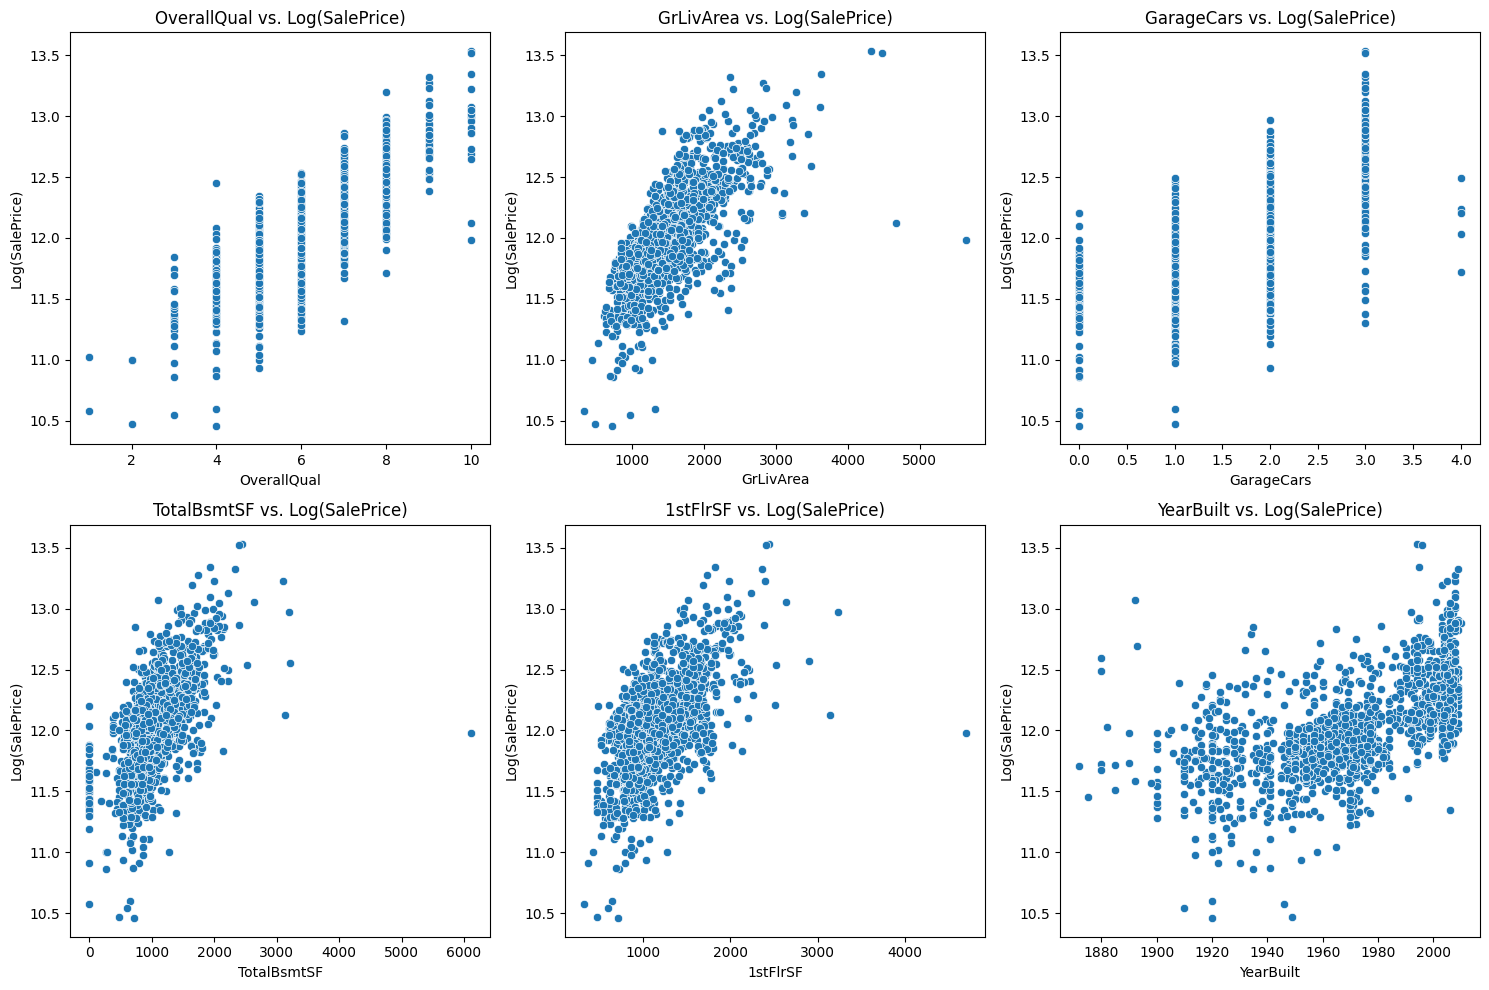

In [27]:
# Features for scatter plots (top positively correlated)
scatter_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', '1stFlrSF', 'YearBuilt']

plt.figure(figsize=(15, 10)) # Adjust as needed
for i, feature in enumerate(scatter_features):
    plt.subplot(2, 3, i + 1) # Create a 2x3 grid of subplots
    sns.scatterplot(x=train_eda_df[feature], y=train_eda_df['SalePrice_Log'])
    plt.title(f'{feature} vs. Log(SalePrice)')
    plt.xlabel(feature)
    plt.ylabel('Log(SalePrice)')

plt.tight_layout()
plt.show()

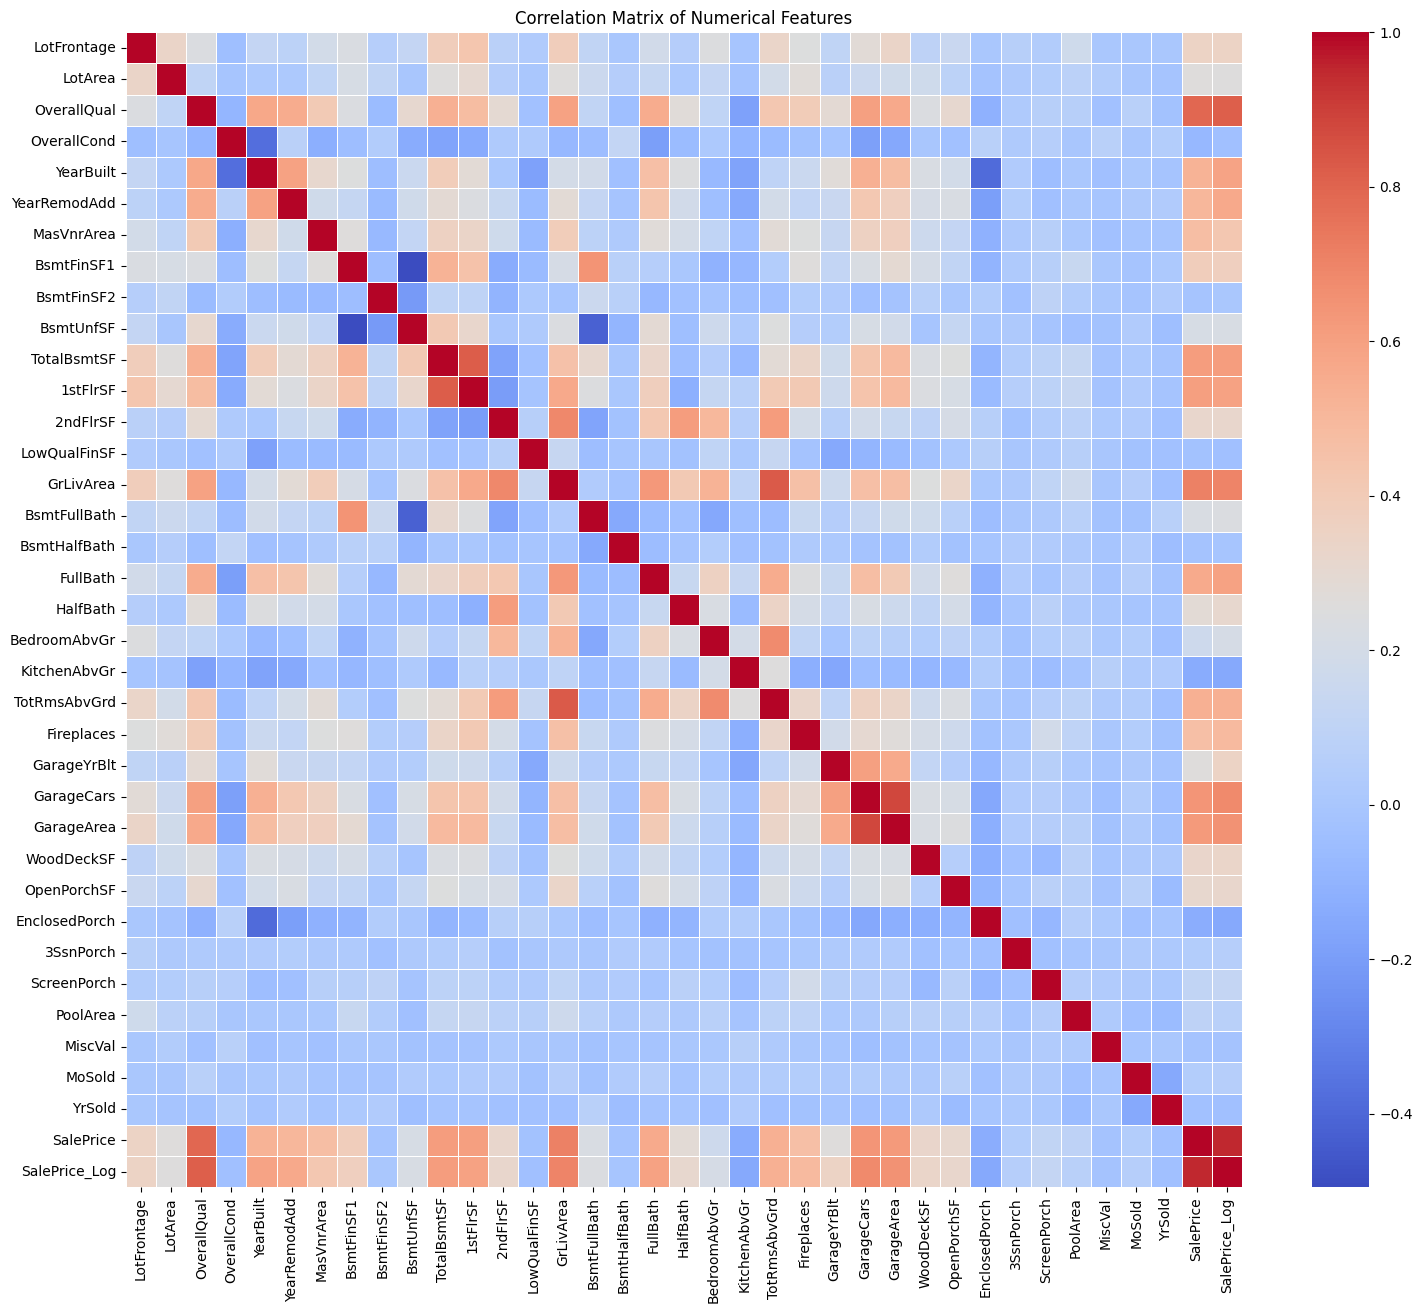


Pairs of features with high correlation (> 0.7 or < -0.7):
SalePrice_Log  SalePrice      0.948374
GarageArea     GarageCars     0.882475
TotRmsAbvGrd   GrLivArea      0.825489
1stFlrSF       TotalBsmtSF    0.819530
SalePrice_Log  OverallQual    0.817184
SalePrice      OverallQual    0.790982
               GrLivArea      0.708624
SalePrice_Log  GrLivArea      0.700927
dtype: float64


In [28]:
# We already have the correlation_matrix from the previous step
# correlation_matrix = numerical_features.corr()

plt.figure(figsize=(18, 15)) # May need to adjust size
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".1f", linewidths=.5)
# annot=True would show numbers, but with many features it's too cluttered.
# annot=False is cleaner. We can look up specific correlations if needed.
# fmt=".1f" formats the annotation to 1 decimal place if annot=True
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# To see specific high correlations (excluding self-correlations of 1):
# Create a mask to only show upper triangle (to avoid redundancy)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Unstack the matrix to get a Series of correlations
corr_unstacked = correlation_matrix.mask(mask).stack().sort_values(ascending=False)
# Filter for high correlations (e.g., > 0.7 or < -0.7, excluding 1)
high_correlations = corr_unstacked[ (abs(corr_unstacked) > 0.7) & (abs(corr_unstacked) < 1.0) ]

print("\nPairs of features with high correlation (> 0.7 or < -0.7):")
print(high_correlations)

<ipython-input-29-b0773f317d68>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='SalePrice_Log', data=train_eda_df, order=order, palette="Set3")
<ipython-input-29-b0773f317d68>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='SalePrice_Log', data=train_eda_df, order=order, palette="Set3")
<ipython-input-29-b0773f317d68>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=feature, y='SalePrice_Log', data=train_eda_df, palette="Set3")
<ipython-input-29-b0773f317d68>:19: FutureWarning: 

Passing `palette` without a

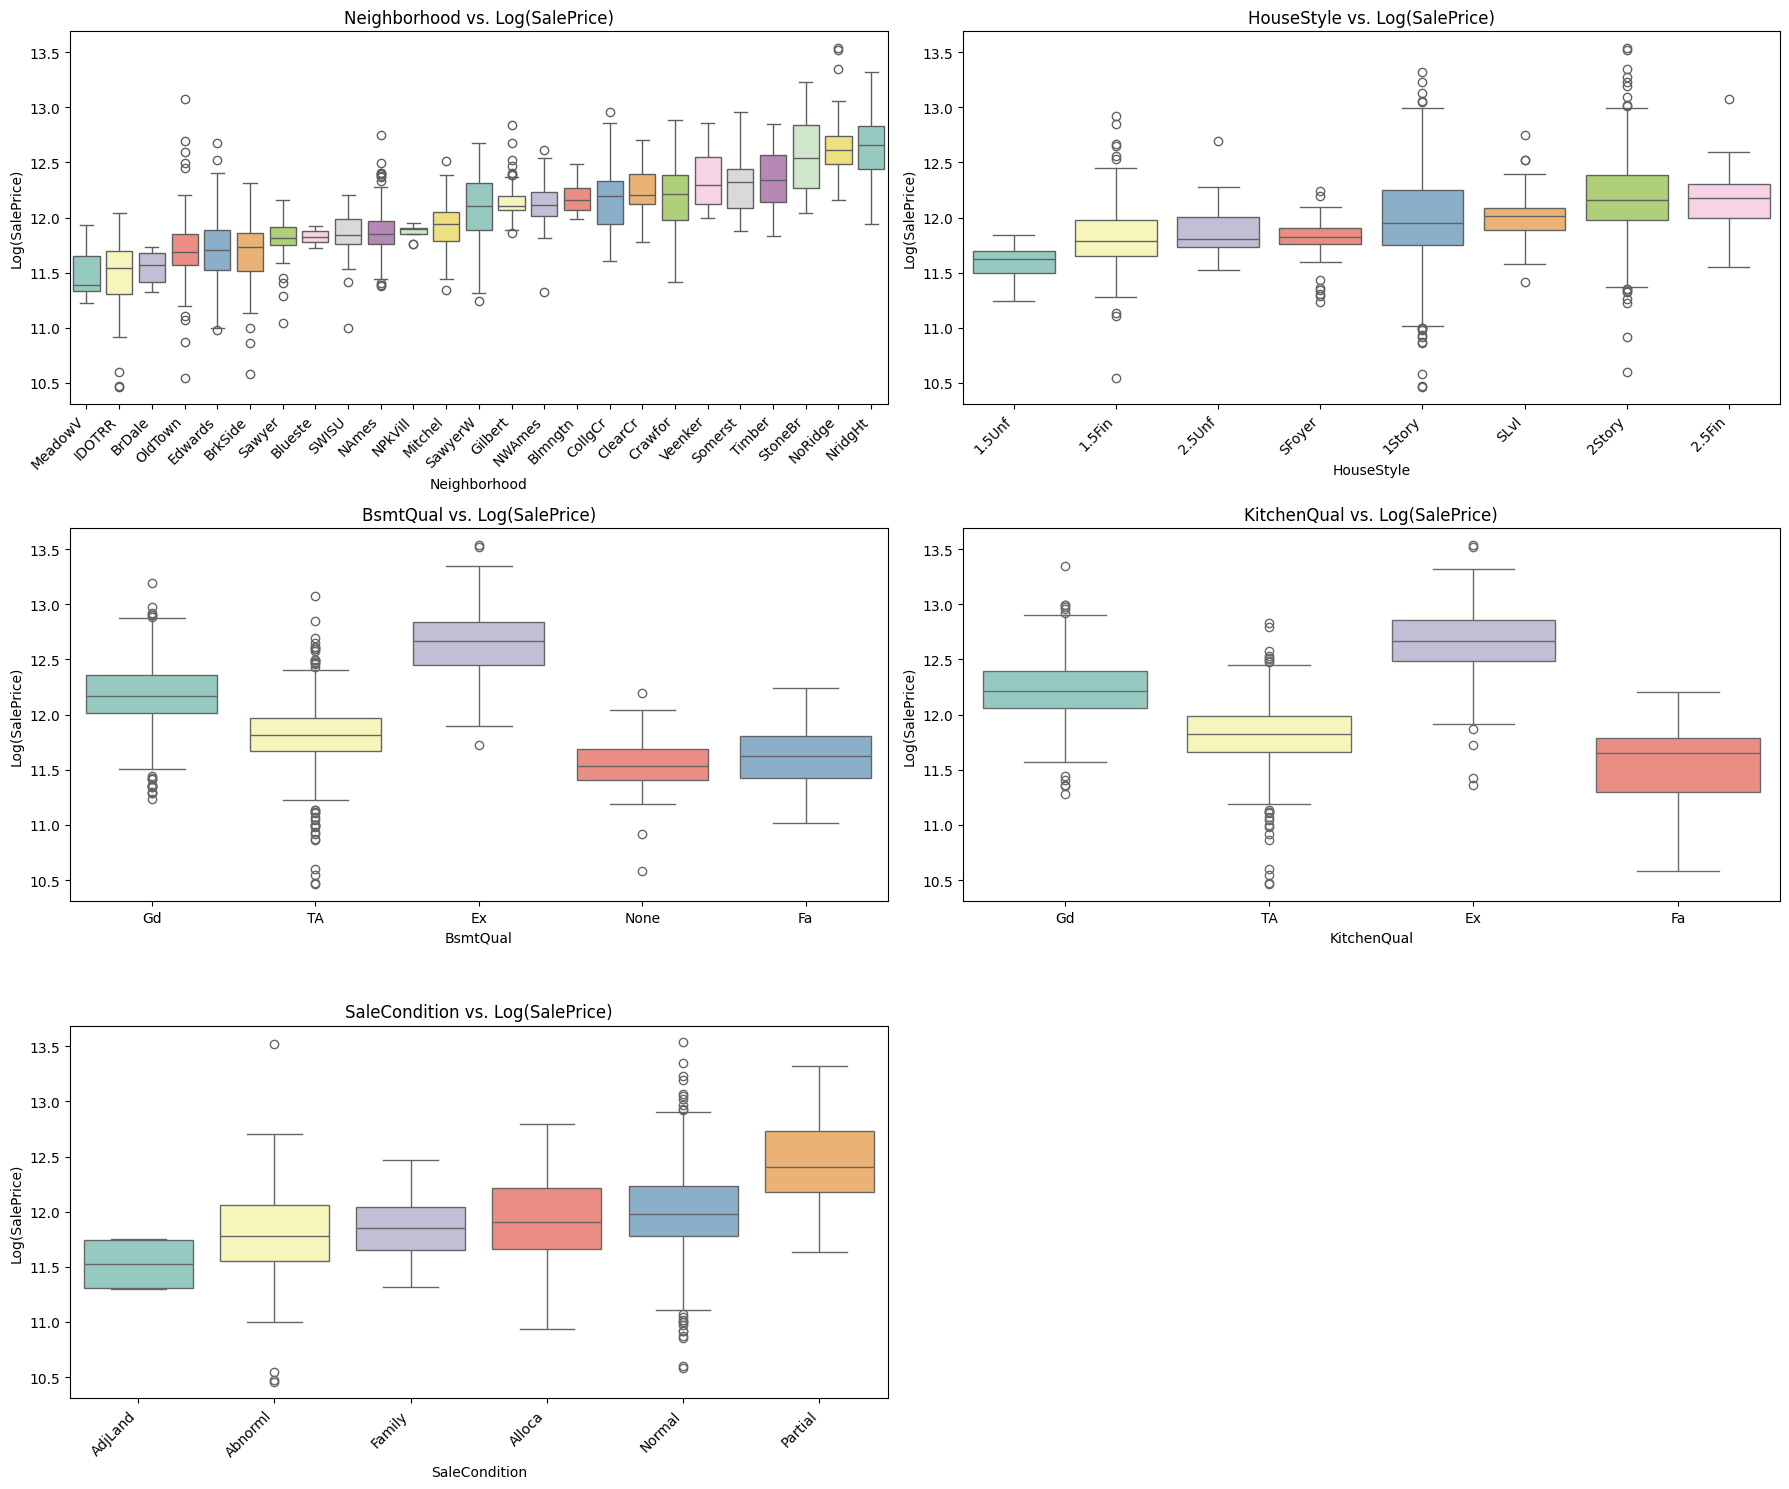

In [29]:
# Select some categorical features for box plots
categorical_eda_features = ['Neighborhood', 'HouseStyle', 'BsmtQual', 'KitchenQual', 'SaleCondition']

# Make sure train_eda_df has SalePrice_Log
if 'SalePrice_Log' not in train_eda_df.columns:
    train_eda_df['SalePrice_Log'] = np.log(train_eda_df['SalePrice'])


plt.figure(figsize=(18, 15)) # Adjust as needed
for i, feature in enumerate(categorical_eda_features):
    # For features with many categories like Neighborhood, sorting them by median SalePrice_Log can make the plot more readable
    if train_eda_df[feature].nunique() > 5: # Heuristic for "many categories"
        order = train_eda_df.groupby(feature)['SalePrice_Log'].median().sort_values().index
        plt.subplot(3, 2, i + 1) # Adjust grid as needed (e.g., 3 rows, 2 columns)
        sns.boxplot(x=feature, y='SalePrice_Log', data=train_eda_df, order=order, palette="Set3")
        plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
    else:
        plt.subplot(3, 2, i + 1)
        sns.boxplot(x=feature, y='SalePrice_Log', data=train_eda_df, palette="Set3")

    plt.title(f'{feature} vs. Log(SalePrice)')
    plt.xlabel(feature)
    plt.ylabel('Log(SalePrice)')

plt.tight_layout()
plt.show()

In [30]:
# --- Feature Engineering ---

# For feature engineering, we'll work on a copy of all_df
# and for outlier removal, we'll adjust train_eda_df and y_train (SalePrice_Log)

print(f"Original train_eda_df shape: {train_eda_df.shape}")
print(f"Original y_train (SalePrice_Log) shape: {train_eda_df['SalePrice_Log'].shape}") # Assuming y_train is SalePrice_Log for now

# Identify outliers in GrLivArea within the training data portion
# These are typically GrLivArea > 4000 (and sometimes SalePrice < 300000, but let's use Log(SalePrice) for consistency)
# A quick look at the scatter plot showed these outliers had GrLivArea > 4000 and Log(SalePrice) was not exceptionally high.
# Let's say, for example, Log(SalePrice) < 12.0 for GrLivArea > 4000 based on visual inspection
outlier_indices_train = train_eda_df[(train_eda_df['GrLivArea'] > 4000) & (train_eda_df['SalePrice_Log'] < 12.5)].index
print(f"Indices of GrLivArea outliers in train_eda_df: {outlier_indices_train}")

# Drop these outliers from train_eda_df and consequently from our target variable
if not outlier_indices_train.empty:
    train_eda_df = train_eda_df.drop(outlier_indices_train)
    # Our y_train_log was created from train_eda_df['SalePrice'], so we just re-extract it
    y_train_log_fe = train_eda_df['SalePrice_Log'].copy()
    print(f"Shape of train_eda_df after removing GrLivArea outliers: {train_eda_df.shape}")
    print(f"Shape of y_train_log_fe after removing GrLivArea outliers: {y_train_log_fe.shape}")
else:
    print("No GrLivArea outliers found with the specified criteria, or already handled.")
    y_train_log_fe = train_eda_df['SalePrice_Log'].copy() # Keep existing target

# We also need to update 'all_df' by dropping these rows from its training portion
# This is important so that subsequent feature engineering on all_df reflects this.
# The outlier_indices_train are direct indices for the first part of all_df
if not outlier_indices_train.empty:
    all_df_fe = all_df.drop(outlier_indices_train).reset_index(drop=True)
    print(f"Shape of all_df_fe after removing outliers: {all_df_fe.shape}")
else:
    all_df_fe = all_df.copy() # No outliers to drop, so use a copy
    print("No GrLivArea outliers to remove from all_df, or already handled.")

# Update n_train for the new length of the training set
n_train_fe = train_eda_df.shape[0]
print(f"New n_train_fe (training set size after outlier removal): {n_train_fe}")

Original train_eda_df shape: (1460, 81)
Original y_train (SalePrice_Log) shape: (1460,)
Indices of GrLivArea outliers in train_eda_df: Index([523, 1298], dtype='int64')
Shape of train_eda_df after removing GrLivArea outliers: (1458, 81)
Shape of y_train_log_fe after removing GrLivArea outliers: (1458,)
Shape of all_df_fe after removing outliers: (2917, 79)
New n_train_fe (training set size after outlier removal): 1458


In [31]:
# Make sure YrSold, YearBuilt, YearRemodAdd, GarageYrBlt are numeric
for col in ['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    all_df_fe[col] = pd.to_numeric(all_df_fe[col], errors='coerce') # Coerce will turn errors into NaT/NaN

all_df_fe['HouseAge'] = all_df_fe['YrSold'] - all_df_fe['YearBuilt']
all_df_fe['RemodelAge'] = all_df_fe['YrSold'] - all_df_fe['YearRemodAdd']

# For GarageAge, GarageYrBlt = 0 means no garage. Age isn't really applicable.
# We can set GarageAge to 0 if no garage, or to HouseAge if no garage (less ideal),
# or a very large number. Setting to 0 is simple if GarageYrBlt is 0.
all_df_fe['GarageAge'] = all_df_fe['YrSold'] - all_df_fe['GarageYrBlt']
# If GarageYrBlt was 0 (no garage), GarageAge would be YrSold (e.g. 2008).
# This might not be ideal. Let's correct it:
all_df_fe.loc[all_df_fe['GarageYrBlt'] == 0, 'GarageAge'] = 0 # If no garage, age is 0

# Check for negative ages (e.g., if YrSold < YearBuilt, or remodel before built) - should not happen with this data
print(f"Min HouseAge: {all_df_fe['HouseAge'].min()}")
print(f"Min RemodelAge: {all_df_fe['RemodelAge'].min()}") # Can be negative if YearRemodAdd is before YearBuilt (error in data)
print(f"Min GarageAge: {all_df_fe['GarageAge'].min()}")

# If RemodelAge is negative, it implies YearRemodAdd was before YearBuilt.
# This is odd. Let's cap it at HouseAge or 0.
# If RemodelDate is before BuildDate, it means the RemodelDate is probably the BuildDate
# or it's an error. The data description says:
# "Remodel date (same as construction date if no remodeling or additions)"
# So, YearRemodAdd should always be >= YearBuilt.
# If RemodelAge < 0, it means YrSold < YearRemodAdd.
# This could happen if YrSold is e.g. 2007 and YearRemodAdd is 2008 (future remodel data).
# Or, it means YearRemodAdd is the same as YearBuilt, and HouseAge should be used.

# A common fix: if YearRemodAdd == YearBuilt, RemodelAge should be HouseAge
# Our calculation already handles this as RemodelAge would equal HouseAge.
# What if YearRemodAdd < YearBuilt (data error)?
# Let's check:
print(f"Number of rows where YearRemodAdd < YearBuilt: { (all_df_fe['YearRemodAdd'] < all_df_fe['YearBuilt']).sum() }")
# If this is 0, then RemodelAge should always be <= HouseAge.
# RemodelAge can't be negative if YrSold is always the latest date.
# And YrSold is always >= YearRemodAdd according to data logic.

# Display a few new age columns
print("\nSample of new Age features:")
print(all_df_fe[['YrSold', 'YearBuilt', 'HouseAge', 'YearRemodAdd', 'RemodelAge', 'GarageYrBlt', 'GarageAge']].head())

Min HouseAge: -1
Min RemodelAge: -2
Min GarageAge: -200.0
Number of rows where YearRemodAdd < YearBuilt: 1

Sample of new Age features:
   YrSold  YearBuilt  HouseAge  YearRemodAdd  RemodelAge  GarageYrBlt  \
0    2008       2003         5          2003           5       2003.0   
1    2007       1976        31          1976          31       1976.0   
2    2008       2001         7          2002           6       2001.0   
3    2006       1915        91          1970          36       1998.0   
4    2008       2000         8          2000           8       2000.0   

   GarageAge  
0        5.0  
1       31.0  
2        7.0  
3        8.0  
4        8.0  


In [32]:
# --- Re-doing Age Feature Creation with Corrections ---

# We operate on all_df_fe
print(f"Shape of all_df_fe before age corrections: {all_df_fe.shape}")

# Ensure date-related columns are numeric.
# errors='coerce' will turn unparseable strings into NaT/NaN.
for col in ['YrSold', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    all_df_fe[col] = pd.to_numeric(all_df_fe[col], errors='coerce')

# 1. Correct YearRemodAdd if it's before YearBuilt
condition_remod_before_built = all_df_fe['YearRemodAdd'] < all_df_fe['YearBuilt']
print(f"Number of rows where YearRemodAdd < YearBuilt originally: {condition_remod_before_built.sum()}")
all_df_fe.loc[condition_remod_before_built, 'YearRemodAdd'] = all_df_fe.loc[condition_remod_before_built, 'YearBuilt']
print(f"Number of rows where YearRemodAdd < YearBuilt after correction: {(all_df_fe['YearRemodAdd'] < all_df_fe['YearBuilt']).sum()}")


# 2. Correct GarageYrBlt if it's in the future relative to YrSold
# Or if GarageYrBlt is an outlier like 2207. Let's assume any GarageYrBlt > YrSold is an error.
# Max YrSold in dataset is 2010. So any GarageYrBlt > 2010 is suspicious.
max_yr_sold = all_df_fe['YrSold'].max() # Should be 2010
condition_garage_future = all_df_fe['GarageYrBlt'] > all_df_fe['YrSold'] # More general
# Also handle the specific 2207 case explicitly if not caught by above, or any year far in future
condition_garage_absurd_future = all_df_fe['GarageYrBlt'] > max_yr_sold + 10 # e.g., > 2020
print(f"Number of rows where GarageYrBlt > YrSold: {condition_garage_future.sum()}")
print(f"Number of rows where GarageYrBlt > {max_yr_sold + 10}: {condition_garage_absurd_future.sum()}")

# For these cases, set GarageYrBlt = YrSold (garage built in year of sale is a reasonable assumption for error correction)
all_df_fe.loc[condition_garage_future, 'GarageYrBlt'] = all_df_fe.loc[condition_garage_future, 'YrSold']
all_df_fe.loc[condition_garage_absurd_future, 'GarageYrBlt'] = all_df_fe.loc[condition_garage_absurd_future, 'YrSold']


# 3. Calculate Age Features
all_df_fe['HouseAge'] = all_df_fe['YrSold'] - all_df_fe['YearBuilt']
all_df_fe['RemodelAge'] = all_df_fe['YrSold'] - all_df_fe['YearRemodAdd']
all_df_fe['GarageAge'] = all_df_fe['YrSold'] - all_df_fe['GarageYrBlt']

# Correct GarageAge for houses with no garage (where GarageYrBlt was imputed as 0 initially)
all_df_fe.loc[all_df_fe['GarageYrBlt'] == 0, 'GarageAge'] = 0


# 4. Cap negative ages at 0 (assuming it's a data entry error implying "brand new" or "same year")
all_df_fe.loc[all_df_fe['HouseAge'] < 0, 'HouseAge'] = 0
all_df_fe.loc[all_df_fe['RemodelAge'] < 0, 'RemodelAge'] = 0
all_df_fe.loc[all_df_fe['GarageAge'] < 0, 'GarageAge'] = 0 # Should be handled by GarageYrBlt correction mostly

# Check min ages again
print(f"\nMin HouseAge after correction: {all_df_fe['HouseAge'].min()}")
print(f"Min RemodelAge after correction: {all_df_fe['RemodelAge'].min()}")
print(f"Min GarageAge after correction: {all_df_fe['GarageAge'].min()}")

# Display a few new age columns
print("\nSample of new Age features after corrections:")
print(all_df_fe[['YrSold', 'YearBuilt', 'HouseAge', 'YearRemodAdd', 'RemodelAge', 'GarageYrBlt', 'GarageAge']].head())
# Check the specific rows if possible
# print(all_df_fe.iloc[2589-n_train_fe]) # Example if we knew the ID of the 2207 GarageYrBlt error

# Let's also check the specific row mentioned to have GarageYrBlt = 2207
# This would be in the test set portion of all_df_fe.
# Original test_df ID 2590 corresponds to index (2590-1461) = 1129 in the test_features part of original all_df
# After our outlier removal from train, the index in all_df_fe would be: n_train_fe + (original_test_index)
# original_test_index_for_2590 = 2590 - 1461 # (assuming test_df IDs start at 1461)
# index_in_all_df_fe_for_2590 = n_train_fe + original_test_index_for_2590
# print(f"\nChecking suspected GarageYrBlt outlier row (Original Test ID 2590):")
# print(all_df_fe.loc[index_in_all_df_fe_for_2590, ['YrSold', 'GarageYrBlt', 'GarageAge']])

# Check how many rows have GarageYrBlt > YrSold AFTER first correction
condition_garage_future_after_corr = all_df_fe['GarageYrBlt'] > all_df_fe['YrSold']
print(f"Number of rows where GarageYrBlt > YrSold AFTER correction: {condition_garage_future_after_corr.sum()}")

Shape of all_df_fe before age corrections: (2917, 82)
Number of rows where YearRemodAdd < YearBuilt originally: 1
Number of rows where YearRemodAdd < YearBuilt after correction: 0
Number of rows where GarageYrBlt > YrSold: 2
Number of rows where GarageYrBlt > 2020: 1

Min HouseAge after correction: 0
Min RemodelAge after correction: 0
Min GarageAge after correction: 0.0

Sample of new Age features after corrections:
   YrSold  YearBuilt  HouseAge  YearRemodAdd  RemodelAge  GarageYrBlt  \
0    2008       2003         5          2003           5       2003.0   
1    2007       1976        31          1976          31       1976.0   
2    2008       2001         7          2002           6       2001.0   
3    2006       1915        91          1970          36       1998.0   
4    2008       2000         8          2000           8       2000.0   

   GarageAge  
0        5.0  
1       31.0  
2        7.0  
3        8.0  
4        8.0  
Number of rows where GarageYrBlt > YrSold AFTER cor

In [33]:
# --- Create Total SF / Count Features ---

# Ensure components are numeric
sf_components = ['TotalBsmtSF', 'GrLivArea', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']
bath_components = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']

for col in sf_components + bath_components:
    all_df_fe[col] = pd.to_numeric(all_df_fe[col], errors='coerce').fillna(0) # Coerce and fill NaNs with 0 if any arose

# Total Square Footage
all_df_fe['TotalSF'] = all_df_fe['TotalBsmtSF'] + all_df_fe['GrLivArea']

# Total Porch Square Footage
all_df_fe['TotalPorchSF'] = (all_df_fe['OpenPorchSF'] +
                             all_df_fe['EnclosedPorch'] +
                             all_df_fe['3SsnPorch'] +
                             all_df_fe['ScreenPorch'])

# Total Number of Bathrooms
all_df_fe['TotalBath'] = (all_df_fe['BsmtFullBath'] +
                          0.5 * all_df_fe['BsmtHalfBath'] +
                          all_df_fe['FullBath'] +
                          0.5 * all_df_fe['HalfBath'])


print("\nSample of new Total SF / Count features:")
print(all_df_fe[['TotalSF', 'GrLivArea', 'TotalBsmtSF', 'TotalPorchSF', 'OpenPorchSF', 'TotalBath', 'FullBath', 'HalfBath']].head())

print(f"\nShape of all_df_fe after adding Total SF/Count features: {all_df_fe.shape}")
# Expected shape: 82 (previous) + 3 (new) = 85


Sample of new Total SF / Count features:
   TotalSF  GrLivArea  TotalBsmtSF  TotalPorchSF  OpenPorchSF  TotalBath  \
0   2566.0       1710        856.0            61           61        3.5   
1   2524.0       1262       1262.0             0            0        2.5   
2   2706.0       1786        920.0            42           42        3.5   
3   2473.0       1717        756.0           307           35        2.0   
4   3343.0       2198       1145.0            84           84        3.5   

   FullBath  HalfBath  
0         2         1  
1         2         0  
2         2         1  
3         1         0  
4         2         1  

Shape of all_df_fe after adding Total SF/Count features: (2917, 85)


In [34]:
# --- Create Polynomial Features for a few key variables ---

key_numeric_for_poly = ['OverallQual', 'GrLivArea', 'TotalSF', 'HouseAge', 'GarageCars', 'TotalBath']

for feature in key_numeric_for_poly:
    if feature in all_df_fe.columns: # Ensure feature exists
        all_df_fe[f'{feature}_sq'] = all_df_fe[feature] ** 2
        # We could also add a cubic term if desired: all_df_fe[f'{feature}_cub'] = all_df_fe[feature] ** 3
    else:
        print(f"Warning: Feature '{feature}' not found for polynomial creation.")

print("\nSample of new Polynomial features (showing original and squared):")
sample_poly_cols = []
for f in key_numeric_for_poly:
    if f in all_df_fe.columns: sample_poly_cols.append(f)
    if f'{f}_sq' in all_df_fe.columns: sample_poly_cols.append(f'{f}_sq')

print(all_df_fe[sample_poly_cols].head())

print(f"\nShape of all_df_fe after adding polynomial features: {all_df_fe.shape}")
# Expected shape: 85 (previous) + 6 (new squared features) = 91


Sample of new Polynomial features (showing original and squared):
   OverallQual  OverallQual_sq  GrLivArea  GrLivArea_sq  TotalSF  TotalSF_sq  \
0            7              49       1710       2924100   2566.0   6584356.0   
1            6              36       1262       1592644   2524.0   6370576.0   
2            7              49       1786       3189796   2706.0   7322436.0   
3            7              49       1717       2948089   2473.0   6115729.0   
4            8              64       2198       4831204   3343.0  11175649.0   

   HouseAge  HouseAge_sq  GarageCars  GarageCars_sq  TotalBath  TotalBath_sq  
0         5           25         2.0            4.0        3.5         12.25  
1        31          961         2.0            4.0        2.5          6.25  
2         7           49         2.0            4.0        3.5         12.25  
3        91         8281         3.0            9.0        2.0          4.00  
4         8           64         3.0            9.0      

In [35]:
# Identify numerical features (excluding our already transformed target)
numerical_cols_in_all_df_fe = all_df_fe.select_dtypes(include=np.number).columns

# Calculate skewness for these numerical features
skewness_df = all_df_fe[numerical_cols_in_all_df_fe].apply(lambda x: x.skew()).sort_values(ascending=False)

print("Skewness of numerical features in all_df_fe:")
print(skewness_df.head(15)) # Show top 15 most skewed
print("---")
print(skewness_df.tail(15)) # Show top 15 least skewed / most negatively skewed

# Define a threshold for "high" skewness
# Commonly, absolute skewness > 0.5 or 0.75 is considered. Let's use 0.75.
skew_threshold = 0.75
highly_skewed_cols = skewness_df[abs(skewness_df) > skew_threshold].index

print(f"\nNumerical features with absolute skewness > {skew_threshold}:")
print(highly_skewed_cols)
print(f"Number of highly skewed features: {len(highly_skewed_cols)}")

# Apply log1p transformation to these highly skewed features
# log1p is log(1+x), good for features with 0s
for col in highly_skewed_cols:
    if col in all_df_fe.columns: # Check if column actually exists
        all_df_fe[col] = np.log1p(all_df_fe[col])
        print(f"Applied log1p to: {col}, new skewness: {all_df_fe[col].skew():.4f}")

print("\nDone with log transformation of skewed numerical features.")

Skewness of numerical features in all_df_fe:
MiscVal          21.950962
PoolArea         17.697766
LotArea          13.116240
LowQualFinSF     12.090757
3SsnPorch        11.377932
TotalSF_sq        4.382160
KitchenAbvGr      4.302763
BsmtFinSF2        4.146636
EnclosedPorch     4.004404
ScreenPorch       3.947131
BsmtHalfBath      3.932018
GrLivArea_sq      2.896486
MasVnrArea        2.623068
OpenPorchSF       2.530660
TotalBath_sq      2.357927
dtype: float64
---
BsmtFullBath    0.622735
HouseAge        0.598364
OverallCond     0.569607
TotalBath       0.486693
RemodelAge      0.449730
BedroomAbvGr    0.326736
GarageArea      0.216968
MoSold          0.197447
OverallQual     0.189688
FullBath        0.165599
YrSold          0.132064
GarageCars     -0.219410
YearRemodAdd   -0.450363
YearBuilt      -0.599503
GarageYrBlt    -3.907260
dtype: float64

Numerical features with absolute skewness > 0.75:
Index(['MiscVal', 'PoolArea', 'LotArea', 'LowQualFinSF', '3SsnPorch',
       'TotalSF_sq',

In [36]:
print(f"Shape of all_df_fe before one-hot encoding: {all_df_fe.shape}")
print(f"Number of object columns before encoding: {len(all_df_fe.select_dtypes(include='object').columns)}")

# Perform one-hot encoding
all_df_encoded = pd.get_dummies(all_df_fe, dummy_na=False)
# dummy_na=False means we don't create a separate column for NaN values (we've already handled NaNs)

print(f"Shape of all_df_encoded after one-hot encoding: {all_df_encoded.shape}")
print(f"Number of object columns after encoding: {len(all_df_encoded.select_dtypes(include='object').columns)}")
print(f"Number of new columns created by get_dummies: {all_df_encoded.shape[1] - all_df_fe.shape[1]}")

# Display a few columns to see the effect (e.g., an original categorical and its new one-hot columns)
# Let's pick 'MSZoning' which had a few categories
original_mszoning_cols = [col for col in all_df_encoded.columns if 'MSZoning' in col]
print("\nSample of MSZoning after one-hot encoding:")
print(all_df_encoded[original_mszoning_cols].head())

Shape of all_df_fe before one-hot encoding: (2917, 91)
Number of object columns before encoding: 44
Shape of all_df_encoded after one-hot encoding: (2917, 328)
Number of object columns after encoding: 0
Number of new columns created by get_dummies: 237

Sample of MSZoning after one-hot encoding:
   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM
0             False        False        False         True        False
1             False        False        False         True        False
2             False        False        False         True        False
3             False        False        False         True        False
4             False        False        False         True        False


In [37]:
# Remember n_train_fe is the number of rows in the training set after outlier removal
print(f"Number of training samples (n_train_fe): {n_train_fe}")

X = all_df_encoded.copy() # Our full feature set

# Split back into training and testing sets
X_train_processed = X[:n_train_fe]
X_test_processed = X[n_train_fe:]

# Our target variable is y_train_log_fe (log-transformed SalePrice for the training set, with outliers removed)
y_train_final = y_train_log_fe.copy()

print(f"\nShape of X_train_processed: {X_train_processed.shape}")
print(f"Shape of y_train_final: {y_train_final.shape}")
print(f"Shape of X_test_processed: {X_test_processed.shape}")

# Verify consistency
if X_train_processed.shape[0] == y_train_final.shape[0]:
    print("\nTrain features and target have consistent number of samples. Good!")
else:
    print("\nError! Mismatch in number of samples between X_train_processed and y_train_final.")

Number of training samples (n_train_fe): 1458

Shape of X_train_processed: (1458, 328)
Shape of y_train_final: (1458,)
Shape of X_test_processed: (1459, 328)

Train features and target have consistent number of samples. Good!


In [38]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train_processed)

# Transform the test data using the SAME fitted scaler
X_test_scaled = scaler.transform(X_test_processed)

# The output of scaler is a NumPy array. Let's convert it back to a DataFrame
# with the original column names for clarity, though for model training, NumPy array is fine.
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train_processed.columns, index=X_train_processed.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test_processed.columns, index=X_test_processed.index)

print("\nData scaling complete.")
print("Sample of scaled training data (first 5 rows, first 5 columns):")
print(X_train_scaled_df.iloc[:5, :5])

print("\nMean of first 5 columns in scaled training data (should be close to 0):")
print(X_train_scaled_df.iloc[:, :5].mean())

print("\nStd dev of first 5 columns in scaled training data (should be close to 1):")
print(X_train_scaled_df.iloc[:, :5].std())


Data scaling complete.
Sample of scaled training data (first 5 rows, first 5 columns):
   LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt
0    -0.078764 -0.129624     0.658506    -0.517649   1.052959
1     0.559191  0.118819    -0.068293     2.177825   0.158428
2     0.059708  0.427643     0.658506    -0.517649   0.986698
3    -0.324174  0.108651     0.658506    -0.517649  -1.862551
4     0.709346  0.889295     1.385305    -0.517649   0.953567

Mean of first 5 columns in scaled training data (should be close to 0):
LotFrontage    6.213594e-17
LotArea       -1.391358e-15
OverallQual   -2.850943e-16
OverallCond    3.204265e-16
YearBuilt      3.033696e-15
dtype: float64

Std dev of first 5 columns in scaled training data (should be close to 1):
LotFrontage    1.000343
LotArea        1.000343
OverallQual    1.000343
OverallCond    1.000343
YearBuilt      1.000343
dtype: float64


In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# --- Model 1: Ridge Regression ---

# Prepare data (using NumPy arrays is often preferred for scikit-learn)
X_train_np = X_train_scaled_df.to_numpy()
y_train_np = y_train_final.to_numpy()
X_test_np = X_test_scaled_df.to_numpy()

# Define the model
# Alpha is the regularization strength. Larger alpha = stronger regularization.
ridge_model = Ridge(alpha=1.0, random_state=42) # random_state for reproducibility if solver involves randomness

# Set up K-Fold Cross-Validation
# n_splits is the number of folds. shuffle=True is good practice.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
# 'neg_mean_squared_error' is used because scikit-learn scorers aim to maximize.
# We want to minimize MSE, so we use its negative.
cv_scores_neg_mse = cross_val_score(ridge_model, X_train_np, y_train_np,
                                    cv=kf, scoring='neg_mean_squared_error')

# Convert scores to positive RMSE
cv_scores_rmse = np.sqrt(-cv_scores_neg_mse)

print("Ridge Regression Cross-Validation RMSE scores:")
print(cv_scores_rmse)
print(f"Mean CV RMSE: {cv_scores_rmse.mean():.4f}")
print(f"Std Dev CV RMSE: {cv_scores_rmse.std():.4f}")

# Optionally, train the model on the full training data to make predictions later
ridge_model.fit(X_train_np, y_train_np)
print("\nRidge model trained on full training data.")

Ridge Regression Cross-Validation RMSE scores:
[0.13284749 0.14225324 0.12779092 0.1407377  0.10663462]
Mean CV RMSE: 0.1301
Std Dev CV RMSE: 0.0128

Ridge model trained on full training data.


In [46]:
import lightgbm as lgb
import pandas as pd
import numpy as np

# --- Model 2: LightGBM Regressor (Revised CV & Corrected Final Fit) ---

# Prepare data
X_train_np = X_train_scaled_df.to_numpy()
y_train_np = y_train_final.to_numpy()

# Define LightGBM parameters
# Note: n_estimators is set to a potentially large value here;
# lgb.cv will determine the optimal number of rounds via early stopping.
params_for_cv = {
    'objective': 'regression_l1',
    'metric': 'rmse',
    'n_estimators': 2000, # Max rounds for CV, early stopping will find optimal
    'learning_rate': 0.01,
    'num_leaves': 31,
    'max_depth': -1,
    'min_child_samples': 20,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42,
    'n_jobs': -1,
    'verbose': -1,
    'boosting_type': 'gbdt',
}

# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train_np, y_train_np)

# Perform cross-validation using lgb.cv
cv_results = lgb.cv(
    params_for_cv,
    lgb_train,
    num_boost_round=params_for_cv['n_estimators'], # Max number of estimators from params
    nfold=5,
    stratified=False,
    shuffle=True,
    seed=42,
    callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=-1),
               lgb.log_evaluation(period=0)]
)

# Get results from lgb.cv
# The number of rounds it actually ran before early stopping (on average)
num_rounds_run = len(cv_results['valid rmse-mean'])
best_rmse_mean = cv_results['valid rmse-mean'][-1]
best_rmse_stdv = cv_results['valid rmse-stdv'][-1]

print(f"LightGBM CV ran for {num_rounds_run} rounds due to early stopping.")
print(f"Mean CV RMSE (LGBM) at best round: {best_rmse_mean:.4f}")
print(f"Std Dev CV RMSE (LGBM) at best round: {best_rmse_stdv:.4f}")


# --- CORRECTED FINAL MODEL TRAINING ---
# Create a new params dictionary for the final model,
# using the optimal number of estimators found by CV.
params_for_final_model = params_for_cv.copy() # Start with CV params
params_for_final_model['n_estimators'] = num_rounds_run # Set optimal n_estimators

# Instantiate and train the final model
final_lgbm_model = lgb.LGBMRegressor(**params_for_final_model)
final_lgbm_model.fit(X_train_np, y_train_np)

print("\nLightGBM model trained on full training data with optimal n_estimators from CV.")

# --- ALTERNATIVE FINAL MODEL TRAINING (with early stopping on full data) ---
# This is also a valid approach, often simpler.
# It lets early stopping decide the n_estimators based on a validation split of the full training data.
# params_for_alternative_fit = params_for_cv.copy() # Start with CV params (which has a large n_estimators)
# alternative_lgbm_model = lgb.LGBMRegressor(**params_for_alternative_fit)
# alternative_lgbm_model.fit(X_train_np, y_train_np,
#                            eval_metric='rmse', # Metric for early stopping
#                            callbacks=[lgb.early_stopping(stopping_rounds=100, verbose=False, min_delta=0.0001)])
# print("\nAlternative LightGBM model trained on full training data with its own early stopping.")

Training until validation scores don't improve for 100 rounds
Did not meet early stopping. Best iteration is:
[1997]	cv_agg's valid rmse: 0.121343 + 0.00952751
LightGBM CV ran for 1997 rounds due to early stopping.
Mean CV RMSE (LGBM) at best round: 0.1213
Std Dev CV RMSE (LGBM) at best round: 0.0095


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



LightGBM model trained on full training data with optimal n_estimators from CV.


In [41]:
!pip install lightgbm

In [47]:
# --- Make Predictions on Test Set and Create Submission File ---

# Ensure X_test_np is ready (it should be from previous steps: scaled numerical version of test data)
# X_test_np = X_test_scaled_df.to_numpy() # If not already in this format

# Make predictions on the test data using the trained LightGBM model
log_test_predictions_lgbm = final_lgbm_model.predict(X_test_np)

# The predictions are on the log scale (log(SalePrice)).
# We need to convert them back to the original SalePrice scale.
actual_test_predictions_lgbm = np.exp(log_test_predictions_lgbm)

# Create the submission DataFrame
# The submission file needs two columns: 'Id' and 'SalePrice'.
# The 'Id' for the test set starts from 1461.
# We can get this from the original test_df.
submission_df_lgbm = pd.DataFrame()
submission_df_lgbm['Id'] = test_df['Id'] # Original test_df loaded at the beginning
submission_df_lgbm['SalePrice'] = actual_test_predictions_lgbm

# Save the submission file
submission_filename_lgbm = 'submission_lightgbm.csv'
submission_df_lgbm.to_csv(submission_filename_lgbm, index=False)

print(f"\nSubmission file '{submission_filename_lgbm}' created successfully.")
print("First 5 rows of the submission file:")
print(submission_df_lgbm.head())

# You can now download this file from your Colab environment and submit it to Kaggle!

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(



Submission file 'submission_lightgbm.csv' created successfully.
First 5 rows of the submission file:
     Id      SalePrice
0  1461  129229.061446
1  1462  157886.468956
2  1463  185354.981409
3  1464  194862.737323
4  1465  184056.721543
